# Predicting Stock price using RNN

Data: 
    * Google stock price data is used for this project

In [3]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [5]:
# reading in the training data

train_data = pd.read_csv("Google_Stock_Price_Train.csv")

In [11]:
#creating a nummpy array from the Open stock price values. This is the value the model will be predicting

training_set = train_data.loc[: , 'Open'].values

In [20]:
training_set = training_set.reshape(1258,1)

In [21]:
training_set.shape

(1258, 1)

In [22]:
# Feature Scaling - Normalising the values before feeding into the RNN

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_training_set = scaler.fit_transform(training_set)

In [31]:
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [34]:
# Selecting 60(Experimentally determined by few trial and error) timesteps for 1 output

X_train = []
y_train = []

for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i, 0])
    y_train.append(scaled_training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [36]:
X_train[0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
       0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
       0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656])

In [37]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [38]:
X_train.shape , y_train.shape

((1198, 60), (1198,))

In [39]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [41]:
X_train.shape

(1198, 60, 1)

In [42]:
#importing necessary models and layers for building the RNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [43]:
regressor = Sequential()

In [44]:
# 4 LSTM(experimental) layers added along with Dropout layers to prevent overfitting

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(rate = 0.20))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.20))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.20))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(rate = 0.20))

In [46]:
# Fully connected dense layer that outputs a single predicted stock price

regressor.add(Dense(units = 1))

In [47]:
regressor.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [48]:
# Fitting model to training sets. Parameters selected using trial and error.

regressor.fit(X_train, y_train, epochs=100 , batch_size = 32 )

Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0438
Epoch 2/100
1198/1198 [==============================] - 3s 3ms/sample - loss: 0.0064
Epoch 3/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0058
Epoch 4/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0062
Epoch 7/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0040
Epoch 9/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0038
Epoch 12/100
1198/1198 [======

1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0016
Epoch 96/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 3s 3ms/sample - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0014


In [50]:
# reading in the test data

test_data = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_data.loc[:, 'Open'].values

In [54]:
real_stock_price = real_stock_price.reshape(20,1)

In [55]:
real_stock_price.shape

(20, 1)

In [67]:
# Concatenating train and test datasets to create input dataset

dataset_total = pd.concat((train_data['Open'], test_data['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60 : ].values

In [68]:
inputs.shape

(80,)

In [70]:
inputs = inputs.reshape(-1,1)

In [71]:
inputs = scaler.transform(inputs)

In [72]:
X_test = []

for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

In [74]:
X_test[0]

array([0.9299055 , 0.93113327, 0.92750577, 0.94415507, 0.93876032,
       0.93403527, 0.93483518, 0.9313937 , 0.94636878, 0.96569685,
       0.97510976, 0.95966962, 0.97808617, 1.        , 0.98076494,
       0.97083116, 0.98450406, 0.96054394, 0.9371419 , 0.92841729,
       0.90804747, 0.8771858 , 0.92153434, 0.93809063, 0.93165414,
       0.95254483, 0.88812412, 0.88637547, 0.87032145, 0.88563137,
       0.90743359, 0.91571173, 0.89941588, 0.91805566, 0.9089404 ,
       0.9024853 , 0.89456061, 0.91600938, 0.9132934 , 0.88979835,
       0.86589404, 0.89030062, 0.90335962, 0.89642086, 0.91777662,
       0.93176576, 0.94114145, 0.95762334, 0.96413424, 0.96402262,
       0.96971501, 0.95077759, 0.96294367, 0.96123223, 0.95475854,
       0.95204256, 0.95163331, 0.95725128, 0.93796041, 0.93688146])

In [75]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [76]:
X_test.shape

(20, 60, 1)

In [85]:
# Predicting using the model

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

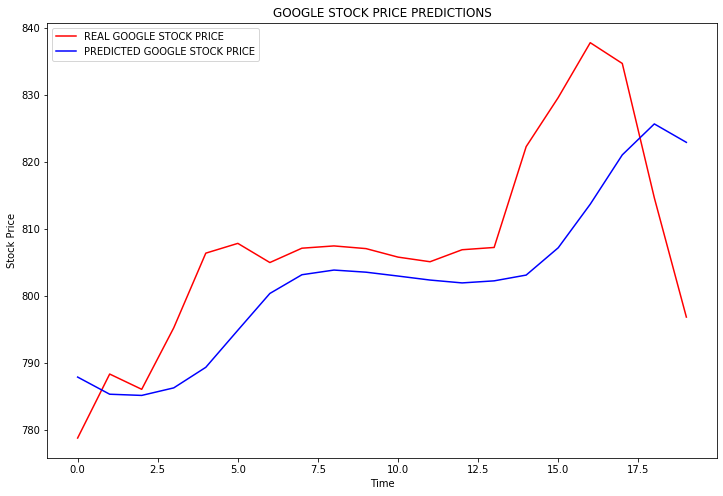

In [94]:
# Visual comparison between real stock prices and predicted stock prices

plt.figure(figsize=(12,8))
plt.plot(real_stock_price, color = 'Red', label = 'REAL GOOGLE STOCK PRICE')
plt.plot(predicted_stock_price, color = 'Blue', label = 'PREDICTED GOOGLE STOCK PRICE')
plt.title('GOOGLE STOCK PRICE PREDICTIONS')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

##                                                        THE END